**Step 1 Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

**Step 2 Reading data file into a python data frame**

In [ ]:
data = pd.read_csv('/content/india-districts-census-2011.csv')
data.head(5)

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629


**Step 3 Statistical Summary**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Columns: 118 entries, District code to Total_Power_Parity
dtypes: int64(116), object(2)
memory usage: 590.1+ KB


In [ ]:
data.describe().round(2)

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
count,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,...,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00,640.00
mean,320.50,1891960.90,973859.78,918101.12,1193185.64,679318.16,513867.48,314653.71,161773.93,152879.78,...,786.05,1696.46,294.00,215.30,509.30,194.20,261.25,455.45,279.63,3315.41
std,184.90,1544380.29,800778.52,744986.39,1068582.63,592414.36,480181.61,312981.76,161121.56,152033.63,...,1038.85,1720.54,638.35,362.68,968.54,424.11,587.28,1007.36,1050.93,4638.57
min,1.00,8004.00,4414.00,3590.00,4436.00,2614.00,1822.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.00
25%,160.75,817861.00,417168.25,401745.75,482598.25,276436.50,200892.00,83208.50,42307.00,42671.75,...,236.75,589.00,59.00,24.75,95.00,19.00,21.00,44.00,18.00,1024.25
50%,320.50,1557367.00,798681.50,758920.00,957346.50,548352.50,403859.00,246016.00,125548.50,117855.00,...,518.00,1220.50,149.00,118.50,278.00,84.00,85.50,186.50,60.50,2238.50
75%,480.25,2583551.25,1338604.50,1264276.75,1602260.25,918858.25,664155.00,447707.75,228460.25,214050.25,...,941.25,2233.25,296.50,262.00,564.50,213.25,293.00,497.00,215.50,3959.00
max,640.00,11060148.00,5865078.00,5195070.00,8227161.00,4591396.00,3635765.00,2464032.00,1266504.00,1197528.00,...,10334.00,13819.00,10835.00,3595.00,14430.00,5027.00,7597.00,12624.00,18289.00,60163.00


**Step 4 Checking for null values**

In [ ]:
data.isnull().sum()

District code                    0
State name                       0
District name                    0
Population                       0
Male                             0
                                ..
Power_Parity_Rs_330000_425000    0
Power_Parity_Rs_425000_545000    0
Power_Parity_Rs_330000_545000    0
Power_Parity_Above_Rs_545000     0
Total_Power_Parity               0
Length: 118, dtype: int64

There are no null values so carrying forword with our analysis.

**Step 5 Dumping unwanted columns**

In [ ]:
data.drop(['SC','Male_SC','Female_SC','ST','Male_ST','Female_ST','Male_Workers','Female_Workers','Hindus','Muslims','Christians','Sikhs','Buddhists','Jains','Others_Religions','Religion_Not_Stated','LPG_or_PNG_Households','Households_with_Bicycle','Households_with_Car_Jeep_Van','Households_with_Radio_Transistor','Households_with_Scooter_Motorcycle_Moped','Married_couples_1_Households','Married_couples_2_Households','Married_couples_3_Households','Married_couples_3_or_more_Households','Married_couples_4_Households','Married_couples_5__Households','Married_couples_None_Households','Household_size_1_person_Households','Household_size_2_persons_Households','Household_size_1_to_2_persons','Household_size_3_persons_Households','Household_size_3_to_5_persons_Households','Household_size_4_persons_Households','Household_size_5_persons_Households','Household_size_6_8_persons_Households','Household_size_9_persons_and_above_Households','Location_of_drinking_water_source_Away_Households','Type_of_bathing_facility_Enclosure_without_roof_Households','Type_of_fuel_used_for_cooking_Any_other_Households','Type_of_latrine_facility_Pit_latrine_Households','Type_of_latrine_facility_Other_latrine_Households','Type_of_latrine_facility_Night_soil_disposed_into_open_drain_Households','Type_of_latrine_facility_Flush_pour_flush_latrine_connected_to_other_system_Households','Not_having_bathing_facility_within_the_premises_Total_Households','Not_having_latrine_facility_within_the_premises_Alternative_source_Open_Households','Main_source_of_drinking_water_Un_covered_well_Households','Main_source_of_drinking_water_Handpump_Tubewell_Borewell_Households','Main_source_of_drinking_water_Spring_Households','Main_source_of_drinking_water_River_Canal_Households','Main_source_of_drinking_water_Other_sources_Households','Main_source_of_drinking_water_Other_sources_Spring_River_Canal_Tank_Pond_Lake_Other_sources__Households','Location_of_drinking_water_source_Near_the_premises_Households','Location_of_drinking_water_source_Within_the_premises_Households','Main_source_of_drinking_water_Tank_Pond_Lake_Households','Main_source_of_drinking_water_Tapwater_Households','Main_source_of_drinking_water_Tubewell_Borehole_Households','Condition_of_occupied_census_houses_Dilapidated_Households','Households_with_separate_kitchen_Cooking_inside_house','Having_bathing_facility_Total_Households','Having_latrine_facility_within_the_premises_Total_Households','Ownership_Owned_Households','Ownership_Rented_Households','Households_with_Telephone_Mobile_Phone_Landline_only','Households_with_Telephone_Mobile_Phone_Mobile_only','Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car','Households_with_Television','Households_with_Telephone_Mobile_Phone','Households_with_Telephone_Mobile_Phone_Both'
                        ,'Housholds_with_Electric_Lighting'], axis=1, inplace= True)

In [ ]:
data.columns

Index(['District code', 'State name', 'District name', 'Population', 'Male',
       'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'Workers',
       'Main_Workers', 'Marginal_Workers', 'Non_Workers', 'Cultivator_Workers',
       'Agricultural_Workers', 'Household_Workers', 'Other_Workers',
       'Households_with_Internet', 'Households_with_Computer',
       'Rural_Households', 'Urban_Households', 'Households',
       'Below_Primary_Education', 'Primary_Education', 'Middle_Education',
       'Secondary_Education', 'Higher_Education', 'Graduate_Education',
       'Other_Education', 'Literate_Education', 'Illiterate_Education',
       'Total_Education', 'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50',
       'Age not stated', 'Power_Parity_Less_than_Rs_45000',
       'Power_Parity_Rs_45000_90000', 'Power_Parity_Rs_90000_150000',
       'Power_Parity_Rs_45000_150000', 'Power_Parity_Rs_150000_240000',
       'Power_Parity_Rs_240000_330000', 'Power_Parity_Rs_150000_330000',
 

**Step 6 Exploring for insights at State level**

In [ ]:
fig = px.histogram(data,
                   x="State name",
                   y = "Population",
                   title='Population Vs States')
fig.update_layout(bargap=0.1)
fig.show()

So there are many states which can be selected for our start up to launch their services in solely based on population count.

Most likely more business will be generssated from states like :

* Rajasthan
* Uttarpradesh
* Bihar
* West Bengal
* Madhya Pradesh
* Gujarat
* Maharastra
* Andhar Pradesh
* Karnataka
* Tamil Nadu

**Note** :- These are states with population greater than 50 Millions and this does not visualize whole scenario it is just a speculation based on Total population count of the above given states.
Now, let's explore number of literate people residing in every state as literacy rate is directly Corrolated by regular medical check ups.

In [ ]:
fig = px. histogram(data,
                   x = "State name",
                   y = "Literate",
                   title = "Literate Population per State")
fig.update_layout(bargap = 0.1)
fig.show()

**Step 7 Exploring for Insights at District level**

Firstly, we are going to make separate data frame for data of above listed states

In [ ]:
NCT_of_Delhi = data[data['State name'] == "NCT OF DELHI"]
Uttar_Pradesh = data[data['State name'] == "UTTAR PRADESH"]
West_Bengal = data[data['State name'] == "WEST BENGAL"]
Gujarat = data[data['State name'] == "GUJARAT"]
Maharashtra = data[data['State name'] == "MAHARASHTRA"]
Andra_Pradesh = data[data['State name'] == "ANDRA PRADESH"]
Karnataka = data[data['State name'] == "KARNATAKA"]
Kerala = data[data['State name'] == "KERALA"]
Tamil_Nadu = data[data['State name'] == "TAMIL NADU"]

It will be a very tedious task to write code for each and every state vise dataframes that we made recently. So we are going to define a function for that purpose.

In [ ]:
def Explore_districts_of(state):
    fig = px.histogram(state,
                       marginal = 'box',
                       x="District name",
                       y = "Population",
                       title='Population Vs Districts')
    fig.update_layout(bargap=0.1)
    fig.show()

    fig = px.histogram(state,
                       marginal = 'box',
                       x="District name",
                       y = "Literate",
                       title='Number of Literate Vs Districts')
    fig.update_layout(bargap=0.1)
    fig.show()

    fig = px.histogram(state,
                      marginal = 'box',
                      x = "District name",
                      y = "Households_with_Internet",
                      title = "Households with Internet in every District")
    fig.show()

In [ ]:
Explore_districts_of(Uttar_Pradesh)

**Step 8 Gathering Insights for few selected states**

In [ ]:
Selected_States = pd.concat([Uttar_Pradesh, Maharashtra, Tamil_Nadu, Karnataka], axis=0)
Selected_States

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Workers,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
131,132,UTTAR PRADESH,Saharanpur,3466382,1834106,1632276,2077108,1220114,856994,1037344,...,974,2349,251,332,583,223,138,361,125,4029
132,133,UTTAR PRADESH,Muzaffarnagar,4143512,2193434,1950078,2417339,1448528,968811,1291644,...,1114,2813,316,416,732,234,173,407,149,4871
133,134,UTTAR PRADESH,Bijnor,3682713,1921215,1761498,2135393,1241471,893922,1088036,...,930,2481,289,381,670,187,142,329,109,4310
134,135,UTTAR PRADESH,Moradabad,4772006,2503186,2268820,2263848,1357435,906413,1417811,...,1250,3125,357,464,821,253,226,479,198,5452
135,136,UTTAR PRADESH,Rampur,2335819,1223889,1111930,1043666,630408,413258,737261,...,474,1439,186,239,425,82,92,174,48,2545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,580,KARNATAKA,Yadgir,1174271,590329,583942,510003,306751,203252,547696,...,563,1257,184,124,308,174,242,416,112,2440
580,581,KARNATAKA,Kolar,1536401,776396,760005,1016219,564110,452109,717872,...,799,1806,206,193,399,271,394,665,41,3389
581,582,KARNATAKA,Chikkaballapura,1255104,636437,618667,783222,442158,341064,639778,...,121,250,30,19,49,27,43,70,39,471
582,583,KARNATAKA,Bangalore Rural,990923,509172,481751,688749,385311,303438,459891,...,368,748,113,59,172,83,135,218,120,1422


In [ ]:
fig = px.treemap(Selected_States,
                 path=['State name','District name'],
                 values='Population',
                 color='Households_with_Internet',
                 color_continuous_scale='RdBu',
                title = 'Finding out best Market')
fig.update_layout(bargap=1,autosize=False,
    width=800,
    height=800,)
fig.show()

fig = px.sunburst(Selected_States,
                 path=['State name','District name'],
                 values='Population',
                 color='Households_with_Internet',
                 color_continuous_scale='RdBu',
                title = 'Finding out best Market')
fig.update_layout(
    autosize=False,
    width=800,
    height=800)
fig.show()

**larger the portion of district in above visuals shows larger total population and color inclination towards darker shades of blue means larger number of households with internet connection.
So it seems there are five districts that looks like promising greater business opportunity for us. especially three of which are in Maharashtra.**

**Step 9 Recommendations based on our EDA**

* Our company should encorrporate some advance data collection methods like foccus groups and mass public surveys to this states and specially to the states corresponding to five districts that show great promise of business gains.public surveys can be conducted online too by giving out incentives or discounts to customers that take part in it. By doing so we are also finalizing our customer base by marketing and also collecting data that can be used to create pyschographic profiles of the participants which will give us enough understanding of the local community, their values and their attitude towards online health services.
* This type of data collection needs to be done at a large scale to get rid of bias which is a very dangerous for our analysis.
* My personal judgement leans towards Maharashtran market as this state has more districts that are attractivve for our profits but also has quality population which has internet services and higher literacy rates.
* Marketing department should first penetrate larger cities which has denser population because more the density of population faster will be the word of mouth marketing like a wildfire spreading across dense forest.
*  After establishing concrete business there we should move towards cities with lesser public and then towards the rural areas as rural segment is very hard to deal with for many reasons like providing fast customer service is very challenging, inventory storage in near by areas is very costly and also possibility of people adopting this change of online healthcare services is very less to allocate our resources to.

In [ ]:
Selected_States.drop(['Power_Parity_Less_than_Rs_45000','Power_Parity_Rs_45000_90000','Power_Parity_Rs_90000_150000','Power_Parity_Rs_45000_150000','Power_Parity_Rs_150000_240000','Power_Parity_Rs_240000_330000','Power_Parity_Rs_150000_330000','Power_Parity_Rs_330000_425000','Power_Parity_Rs_425000_545000','Power_Parity_Rs_330000_545000','Power_Parity_Above_Rs_545000','Total_Power_Parity','Male_Literate','Female_Literate','Workers','Main_Workers','Marginal_Workers','Non_Workers','Cultivator_Workers','Agricultural_Workers','Household_Workers','Other_Workers','Below_Primary_Education','Primary_Education','Middle_Education','Secondary_Education','Higher_Education','Graduate_Education','Other_Education','Literate_Education','Illiterate_Education','Total_Education'], axis=1, inplace= True)
Selected_States.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 131 to 583
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   District code             168 non-null    int64 
 1   State name                168 non-null    object
 2   District name             168 non-null    object
 3   Population                168 non-null    int64 
 4   Male                      168 non-null    int64 
 5   Female                    168 non-null    int64 
 6   Literate                  168 non-null    int64 
 7   Households_with_Internet  168 non-null    int64 
 8   Households_with_Computer  168 non-null    int64 
 9   Rural_Households          168 non-null    int64 
 10  Urban_Households          168 non-null    int64 
 11  Households                168 non-null    int64 
 12  Age_Group_0_29            168 non-null    int64 
 13  Age_Group_30_49           168 non-null    int64 
 14  Age_Group_50            

In [ ]:
Selected_States.corr()

<ipython-input-163-15cfe9aa2c44>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,District code,Population,Male,Female,Literate,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
District code,1.000000,-0.121331,-0.141542,-0.098584,0.038961,0.159186,0.142389,-0.204762,0.209499,0.101705,-0.260047,0.061744,0.119018,-0.493138
Population,-0.121331,1.000000,0.999066,0.998844,0.969780,0.731503,0.800683,0.567404,0.794356,0.951945,0.984909,0.972116,0.948381,0.509430
Male,-0.141542,0.999066,1.000000,0.995832,0.966991,0.734823,0.802280,0.554203,0.797215,0.948948,0.986749,0.969173,0.940003,0.520352
Female,-0.098584,0.998844,0.995832,1.000000,0.970752,0.726202,0.797149,0.580840,0.789432,0.953189,0.980700,0.973254,0.955617,0.496164
Literate,0.038961,0.969780,0.966991,0.970752,1.000000,0.826475,0.882609,0.440882,0.887783,0.982464,0.918900,0.992420,0.973885,0.385775
Households_with_Internet,0.159186,0.731503,0.734823,0.726202,0.826475,1.000000,0.989140,-0.051928,0.958281,0.838044,0.652522,0.827668,0.752498,0.181041
Households_with_Computer,0.142389,0.800683,0.802280,0.797149,0.882609,0.989140,1.000000,0.051724,0.972786,0.894741,0.726316,0.885342,0.813343,0.227474
Rural_Households,-0.204762,0.567404,0.554203,0.580840,0.440882,-0.051928,0.051724,1.000000,0.022659,0.441759,0.609443,0.444223,0.533914,0.394247
Urban_Households,0.209499,0.794356,0.797215,0.789432,0.887783,0.958281,0.972786,0.022659,1.000000,0.906913,0.708097,0.894129,0.825743,0.217719
Households,0.101705,0.951945,0.948948,0.953189,0.982464,0.838044,0.894741,0.441759,0.906913,1.000000,0.892256,0.989566,0.965997,0.361519


<ipython-input-164-847717f52760>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



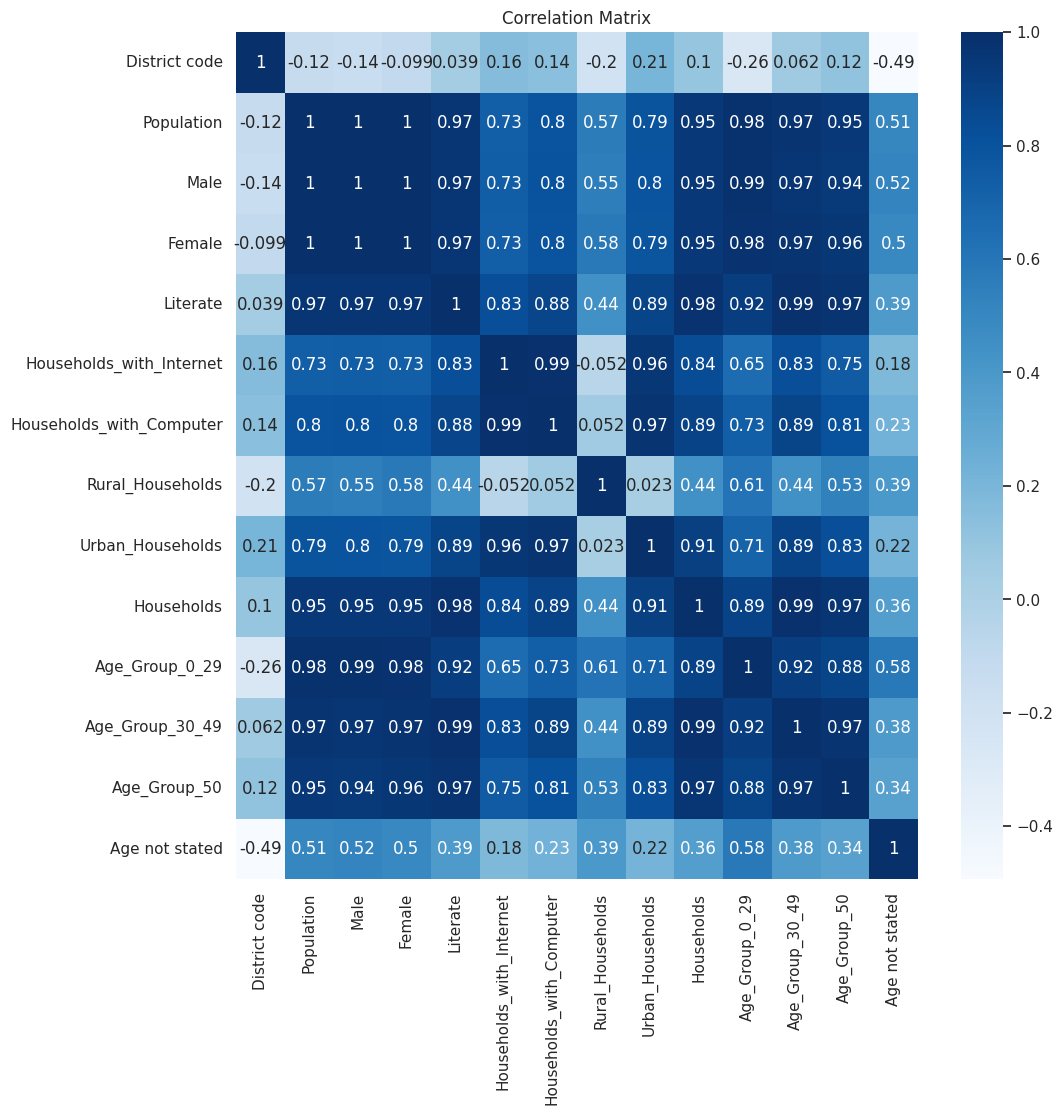

In [ ]:
plt.figure(figsize=(11,11))
sns.heatmap(Selected_States.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix')

In [ ]:
LB = LabelEncoder()

In [ ]:
Selected_States['State name'] = LB.fit_transform(Selected_States['State name'])
Selected_States['District name'] = LB.fit_transform(Selected_States['District name'])
advance_data = Selected_States
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(advance_data)
segmentation_std = pd.DataFrame(segmentation_std,columns=advance_data.columns)
advance_data.corr()

,District code,State name,District name,Population,Male,Female,Literate,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
District code,1.000000,-0.795655,0.203548,-0.121331,-0.141542,-0.098584,0.038961,0.159186,0.142389,-0.204762,0.209499,0.101705,-0.260047,0.061744,0.119018,-0.493138
State name,-0.795655,1.000000,-0.027725,0.092411,0.104025,0.079290,-0.031222,-0.145091,-0.132109,0.163939,-0.161085,-0.075464,0.188273,-0.039677,-0.068558,0.391986
District name,0.203548,-0.027725,1.000000,-0.029396,-0.035803,-0.022206,0.012210,0.003727,0.003445,-0.011346,0.058343,0.047573,-0.069565,0.022360,0.038497,-0.098979
Population,-0.121331,0.092411,-0.029396,1.000000,0.999066,0.998844,0.969780,0.731503,0.800683,0.567404,0.794356,0.951945,0.984909,0.972116,0.948381,0.509430
Male,-0.141542,0.104025,-0.035803,0.999066,1.000000,0.995832,0.966991,0.734823,0.802280,0.554203,0.797215,0.948948,0.986749,0.969173,0.940003,0.520352
Female,-0.098584,0.079290,-0.022206,0.998844,0.995832,1.000000,0.970752,0.726202,0.797149,0.580840,0.789432,0.953189,0.980700,0.973254,0.955617,0.496164
Literate,0.038961,-0.031222,0.012210,0.969780,0.966991,0.970752,1.000000,0.826475,0.882609,0.440882,0.887783,0.982464,0.918900,0.992420,0.973885,0.385775
Households_with_Internet,0.159186,-0.145091,0.003727,0.731503,0.734823,0.726202,0.826475,1.000000,0.989140,-0.051928,0.958281,0.838044,0.652522,0.827668,0.752498,0.181041
Households_with_Computer,0.142389,-0.132109,0.003445,0.800683,0.802280,0.797149,0.882609,0.989140,1.000000,0.051724,0.972786,0.894741,0.726316,0.885342,0.813343,0.227474
Rural_Households,-0.204762,0.163939,-0.011346,0.567404,0.554203,0.580840,0.440882,-0.051928,0.051724,1.000000,0.022659,0.441759,0.609443,0.444223,0.533914,0.394247


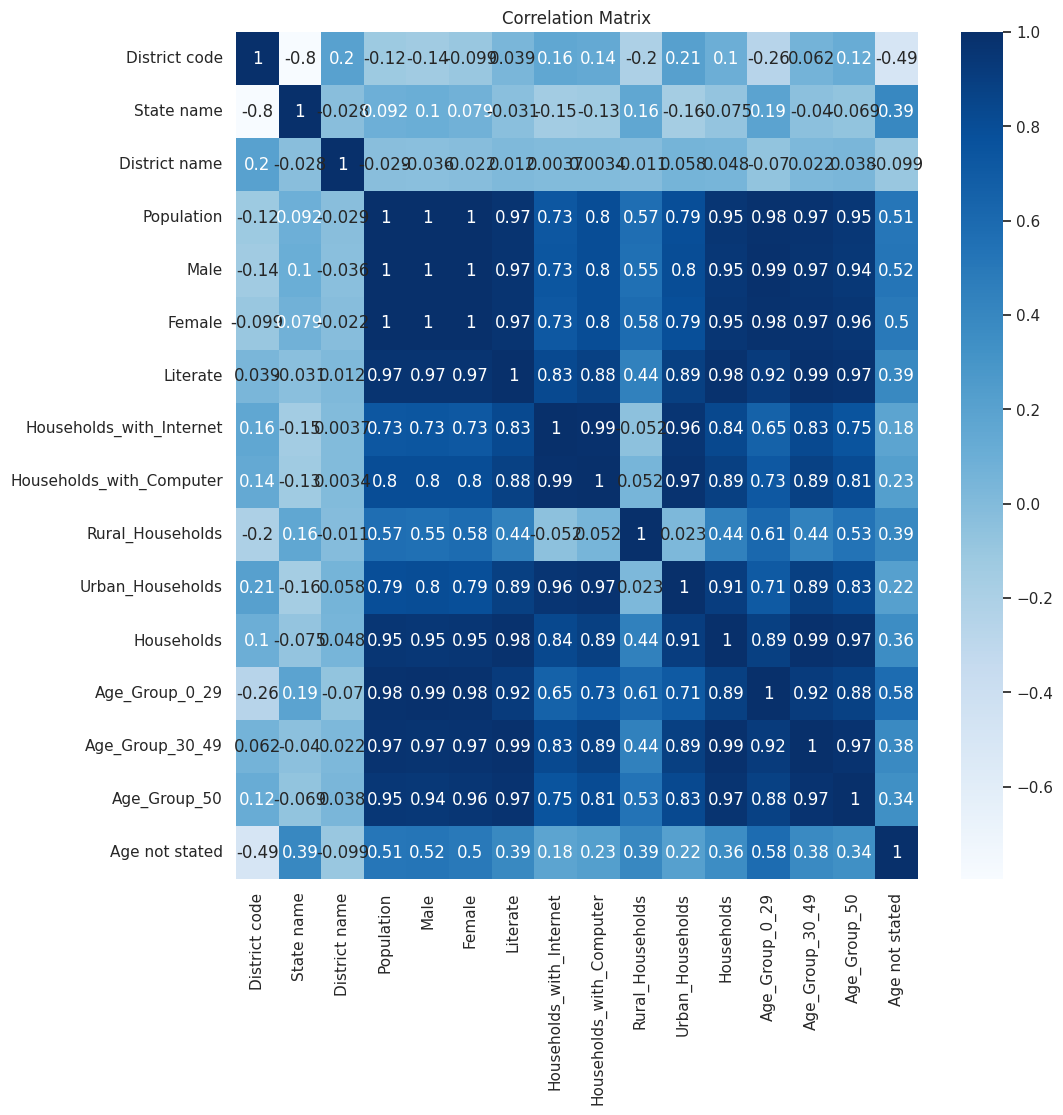

In [ ]:
plt.figure(figsize=(11,11))
sns.heatmap(advance_data.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix')

In [ ]:
segmentation_std= pd.DataFrame(segmentation_std)
print(segmentation_std.max())

District code               1.179951
State name                  0.992915
District name               1.721771
Population                  5.202932
Male                        5.278704
Female                      5.107227
Literate                    5.424253
Households_with_Internet    7.381445
Households_with_Computer    7.382053
Rural_Households            3.433510
Urban_Households            6.289856
Households                  5.833210
Age_Group_0_29              4.936360
Age_Group_30_49             5.685461
Age_Group_50                4.571477
Age not stated              4.137599
dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

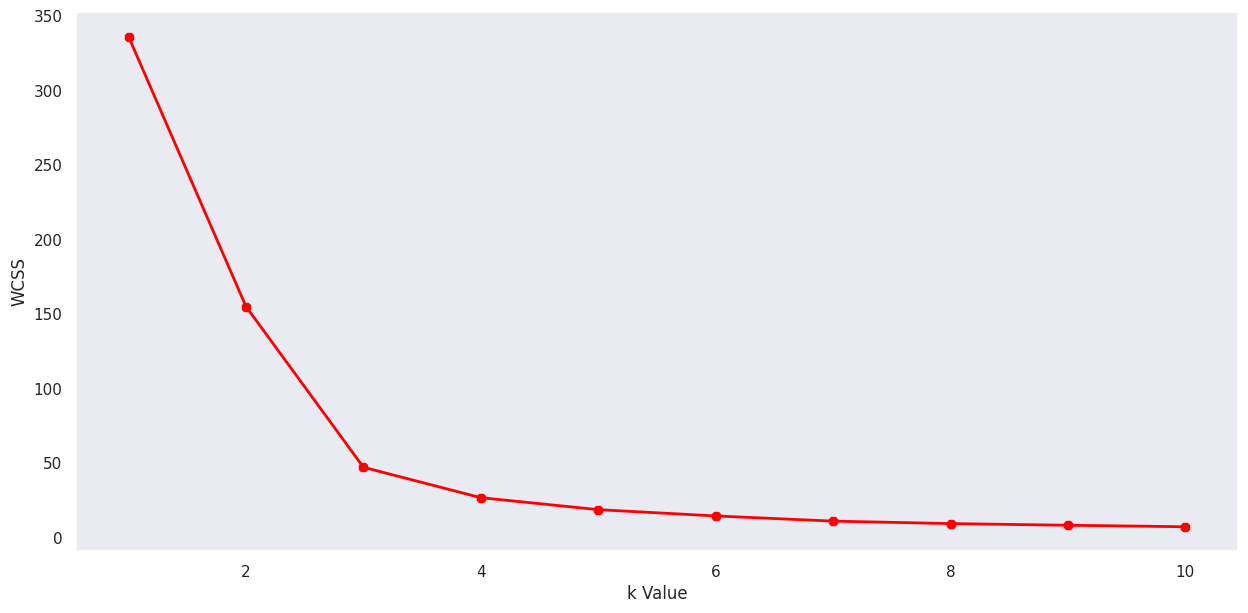

In [ ]:
X1 = segmentation_std.loc[:, ["Population","Literate"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [ ]:
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(X1)
# print(label)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
print(kmeans.cluster_centers_)

[[-0.56327527 -0.51218995]
 [ 4.46468283  4.91976113]
 [ 0.72152495  0.59677741]]


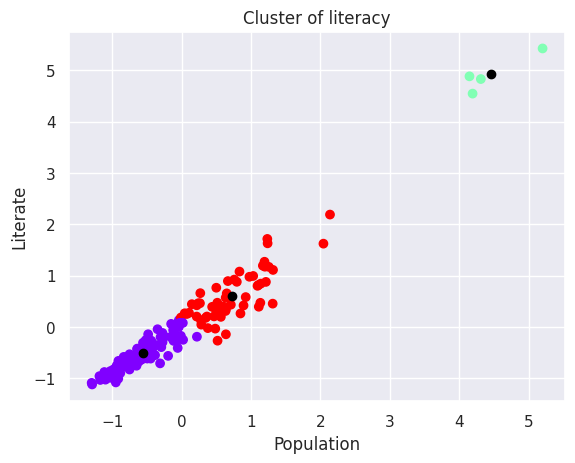

In [ ]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of literacy')
plt.xlabel('Population')
plt.ylabel('Literate')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

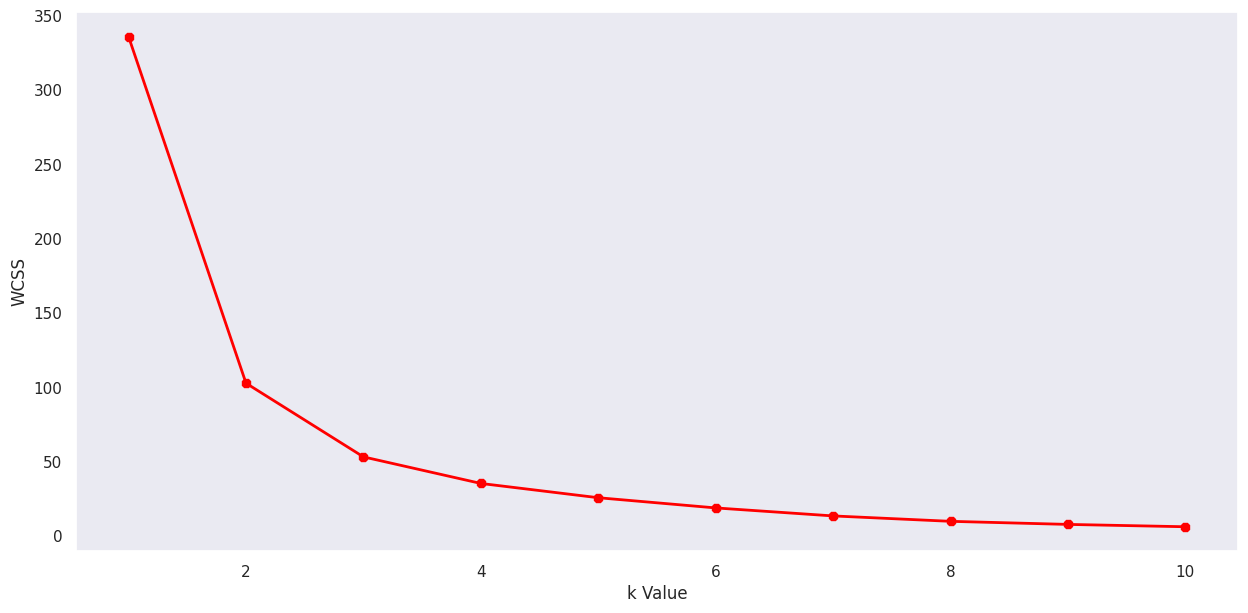

In [ ]:
X1 = segmentation_std.loc[:, ["Households_with_Internet","Literate"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

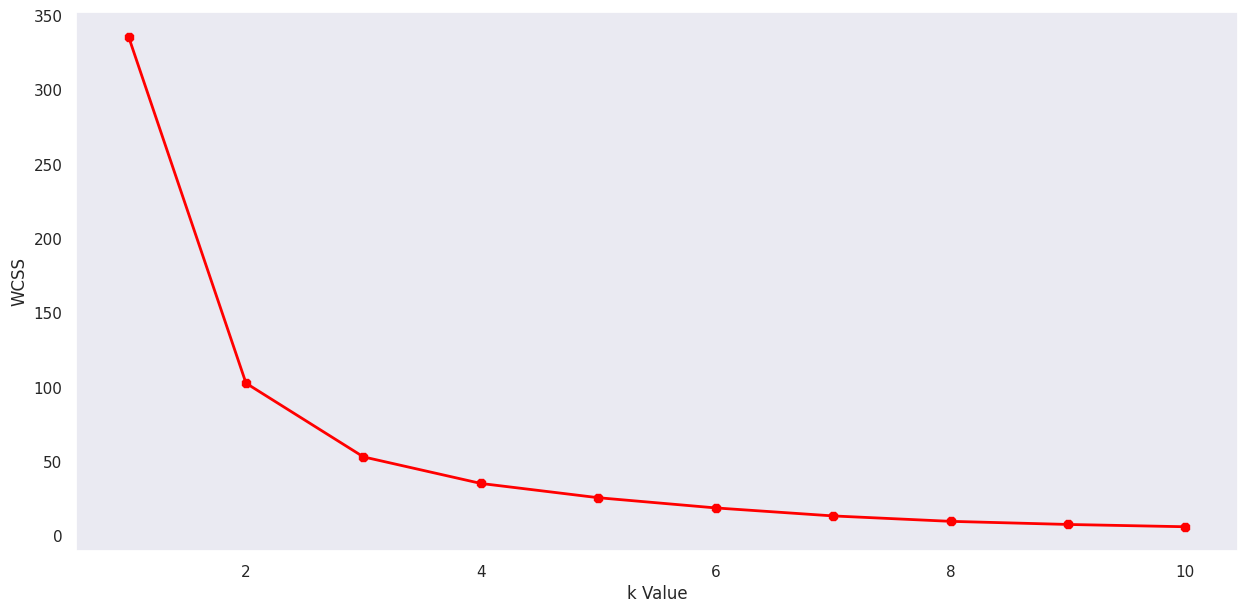

In [ ]:
X1 = segmentation_std.loc[:, ["Households_with_Internet","Literate"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [ ]:
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(X1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[[-0.27097743 -0.51980044]
 [ 5.18770938  4.27897896]
 [ 0.04886071  0.5912974 ]]


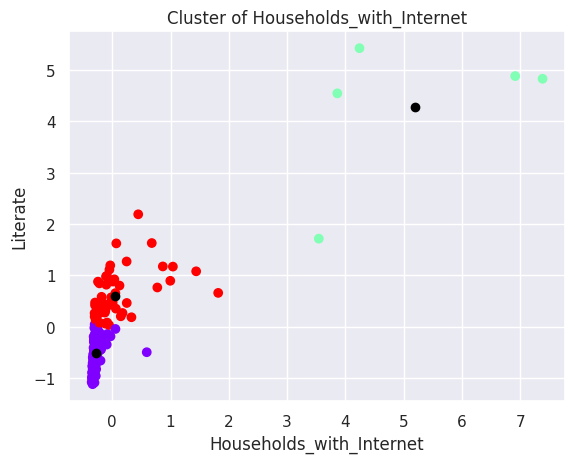

In [ ]:
print(kmeans.cluster_centers_)
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of Households_with_Internet')
plt.xlabel('Households_with_Internet')
plt.ylabel('Literate')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

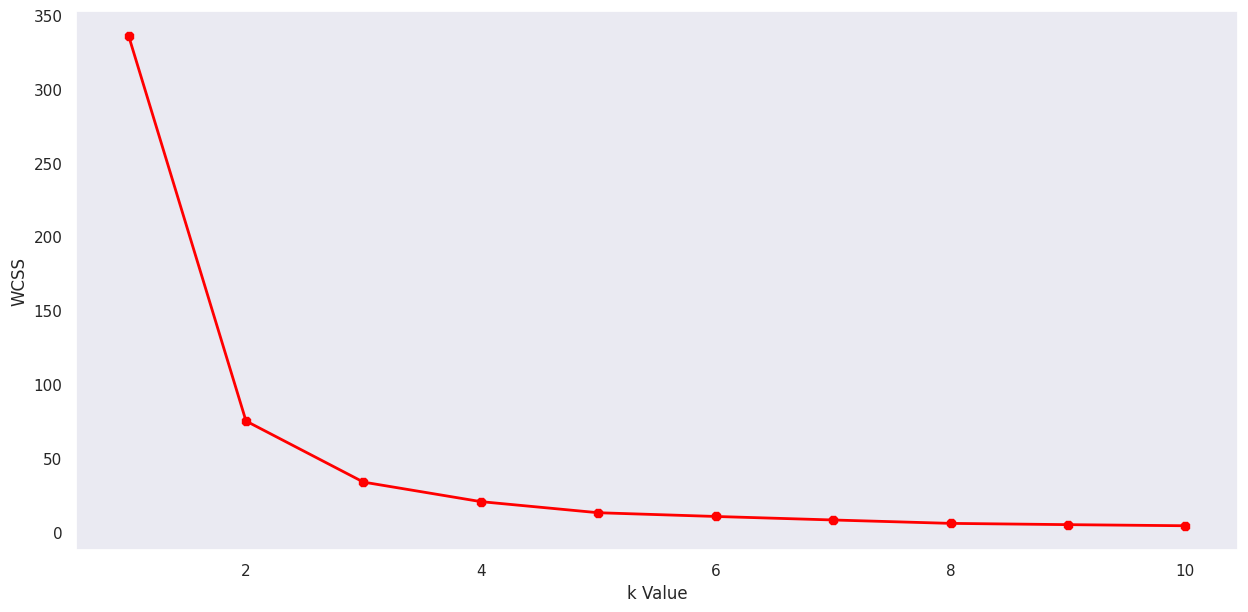

In [ ]:
X1 = segmentation_std.loc[:, ["Urban_Households","Households_with_Computer"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [ ]:
kmeans = KMeans(n_clusters= 2)
label = kmeans.fit_predict(X1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



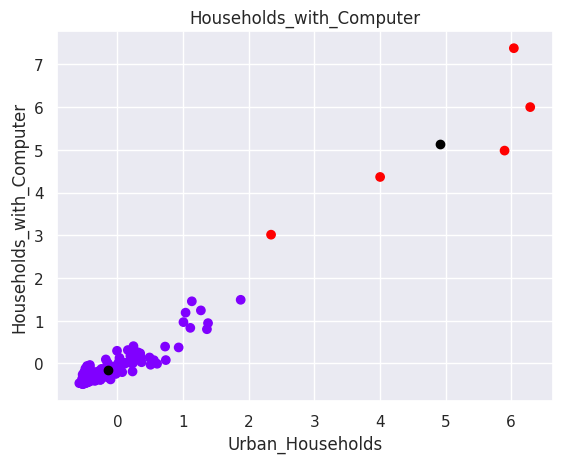

In [ ]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Households_with_Computer')
plt.xlabel('Urban_Households')
plt.ylabel('Households_with_Computer')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

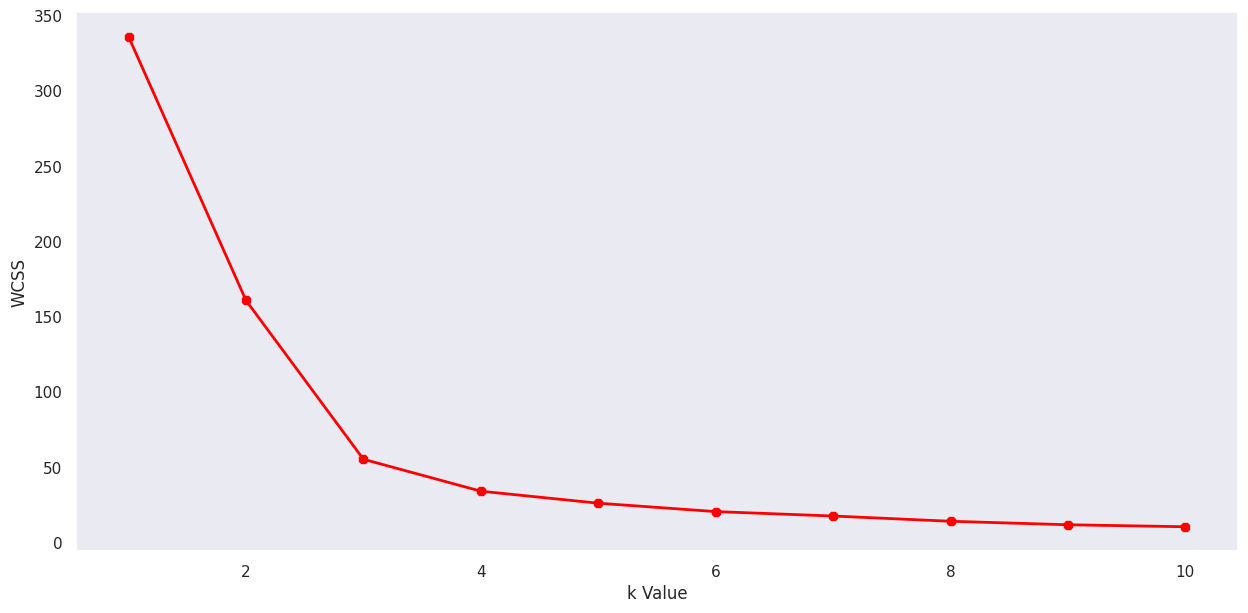

In [ ]:
X1 = segmentation_std.loc[:, ["Age_Group_0_29","Literate"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [ ]:
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(X1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



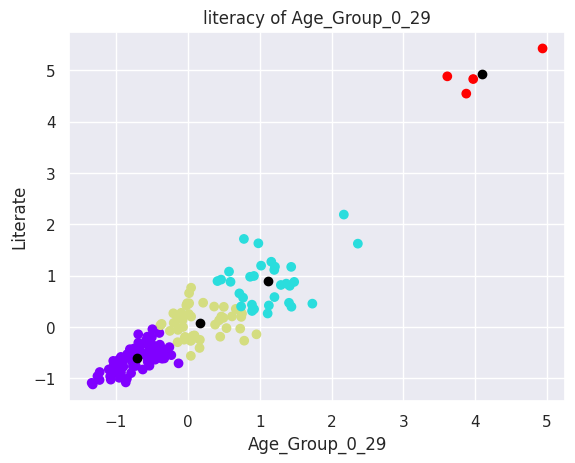

In [ ]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('literacy of Age_Group_0_29')
plt.xlabel('Age_Group_0_29')
plt.ylabel('Literate')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

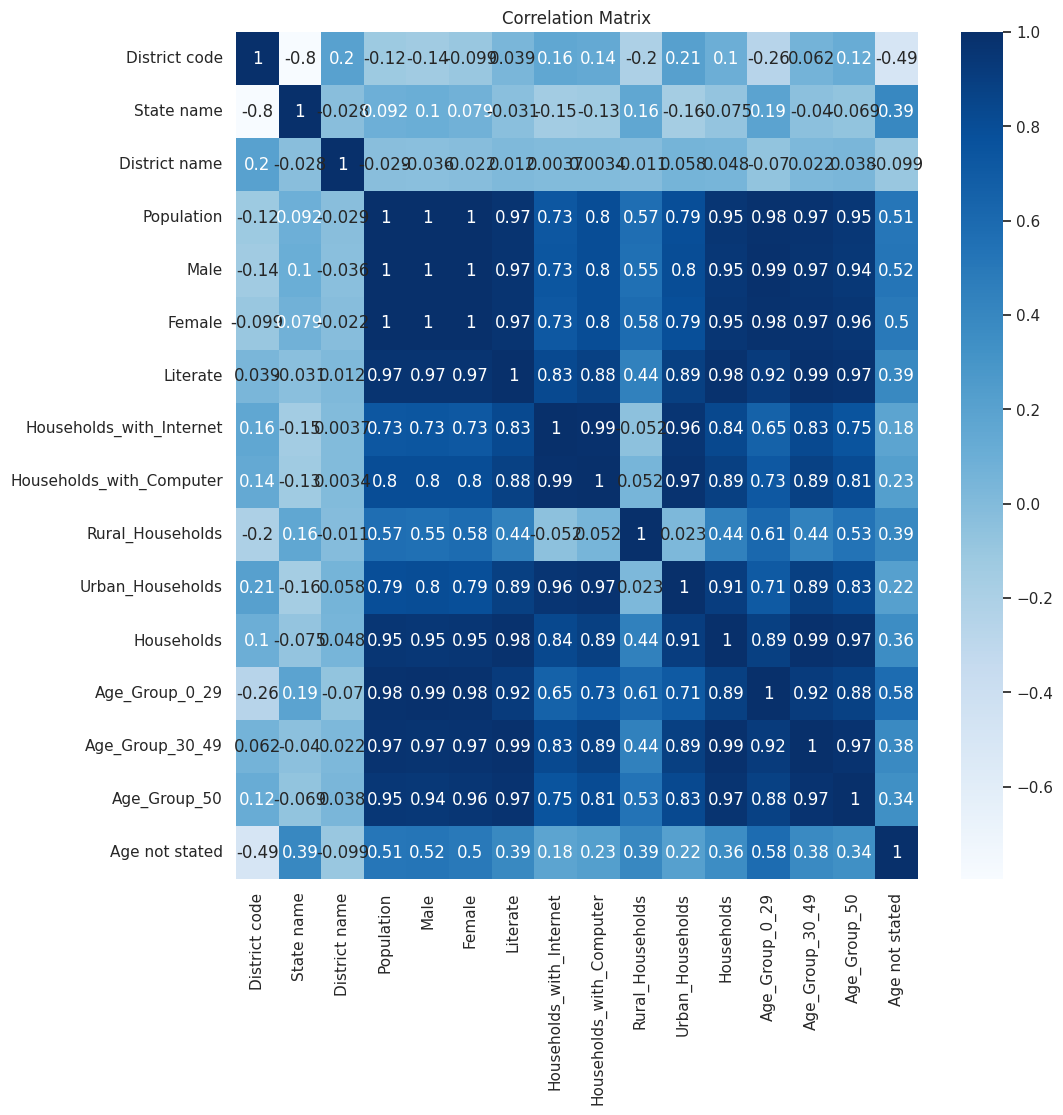

In [ ]:
plt.figure(figsize=(11,11))
sns.heatmap(advance_data.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix')

In [ ]:
x = Selected_States[['District code',	'State name', 'District name', 'Population', 'Male', 'Female', 'Literate',
          'Households_with_Internet', 'Households_with_Computer', 'Rural_Households', 'Urban_Households',
	      'Households',	'Age_Group_0_29', 'Age_Group_30_49',	'Age_Group_50']].values
km = KMeans(n_clusters = 15, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Population'],
    y= segmentation_std['State name'],
    z= segmentation_std['District name'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'],
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'population in States as well as District',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
            xaxis = dict(title  = 'Population'),
            yaxis = dict(title  = 'State name'),
            zaxis = dict(title  = 'District name')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [ ]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Households'],
    y= segmentation_std['Rural_Households'],
    z= segmentation_std['Urban_Households'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'],
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Households in rural and urban',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
            xaxis = dict(title  = 'Households'),
            yaxis = dict(title  = 'Rural_Households'),
            zaxis = dict(title  = 'Urban_Households')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [ ]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['State name'],
    y= segmentation_std['Rural_Households'],
    z= segmentation_std['Urban_Households'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'],
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'households in States',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
            xaxis = dict(title  = 'State name'),
            yaxis = dict(title  = 'Rural_Households'),
            zaxis = dict(title  = 'Urban_Households')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [ ]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Age_Group_0_29'],
    y= segmentation_std['Rural_Households'],
    z= segmentation_std['Urban_Households'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'],
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'households of 0-29 age group',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_0_29'),
            yaxis = dict(title  = 'Rural_Households'),
            zaxis = dict(title  = 'Urban_Households')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [ ]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Age_Group_30_49'],
    y= segmentation_std['Rural_Households'],
    z= segmentation_std['Urban_Households'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'],
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'households of 30-40 Age groups',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_30_49'),
            yaxis = dict(title  = 'Rural_Households'),
            zaxis = dict(title  = 'Urban_Households')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [ ]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Age_Group_50'],
    y= segmentation_std['Rural_Households'],
    z= segmentation_std['Urban_Households'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'],
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Urban and Rural Households',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_50'),
            yaxis = dict(title  = 'Rural_Households'),
            zaxis = dict(title  = 'Urban_Households')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [ ]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Age_Group_0_29'],
    y= segmentation_std['State name'],
    z= segmentation_std['Population'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'],
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'population in States',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_0_29'),
            yaxis = dict(title  = 'State name'),
            zaxis = dict(title  = 'Population')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [ ]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Age_Group_30_49'],
    y= segmentation_std['State name'],
    z= segmentation_std['Population'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'],
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'population in States',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_30_49'),
            yaxis = dict(title  = 'State name'),
            zaxis = dict(title  = 'Population')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [ ]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Age_Group_50'],
    y= segmentation_std['State name'],
    z= segmentation_std['Population'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'],
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'population in States',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_50'),
            yaxis = dict(title  = 'State name'),
            zaxis = dict(title  = 'Population')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)